In [169]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [13]:

calendar_path = os.path.join(os.getcwd(), 'data', 'calendar.csv')
trainDF_path = os.path.join(os.getcwd(), 'data', 'sales_train_validation.csv')
pricesDF_path = os.path.join(os.getcwd(), 'data', 'sell_prices.csv')

df = pd.read_csv(trainDF_path)
calendarDF = pd.read_csv(calendar_path)

In [14]:
df = df[(df['store_id']=='CA_3') & (df['dept_id']=='FOODS_3')]

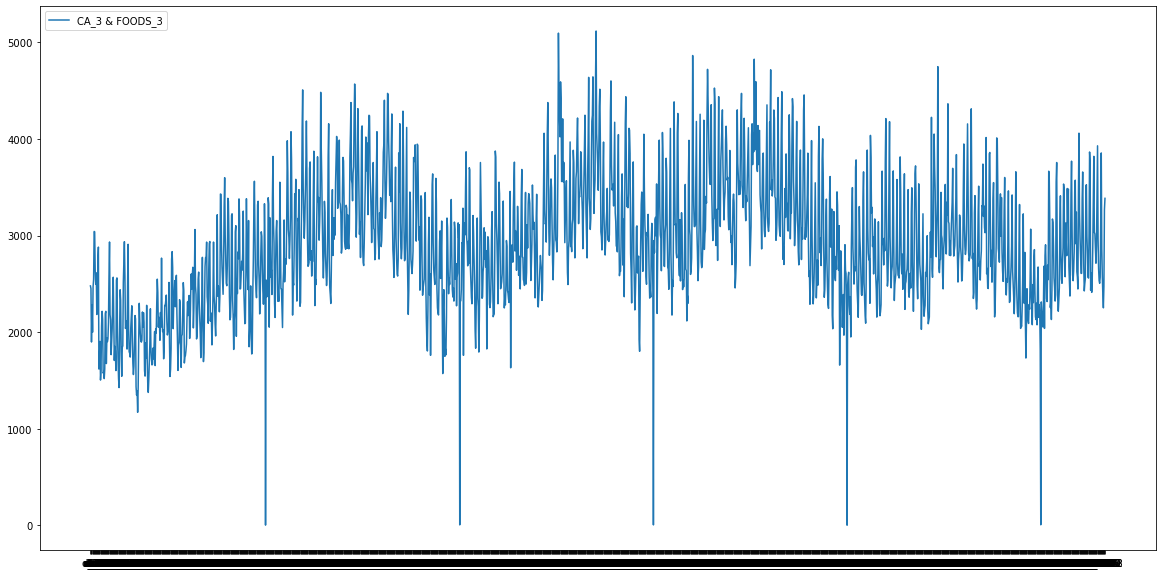

In [15]:
chartData = df.iloc[:,6:].sum()
labels = ['CA_3 & FOODS_3']

plt.figure(figsize=(20,10))
plt.plot(chartData)
plt.legend(labels, loc='upper left')
plt.show()

(0.07041168980027757, 0.002059823253176878)


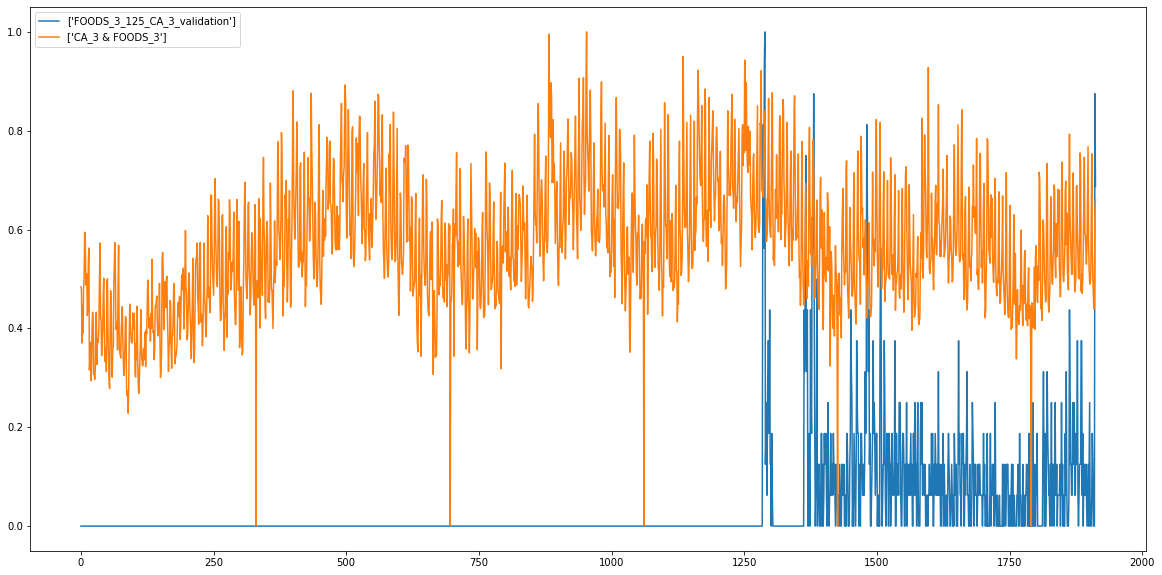

In [20]:
from scipy.stats.stats import pearsonr

itemNum = 123
sales1 = df.iloc[itemNum,6:]

# dfNorm = df.iloc[:,6:].div(df.sum(axis=1), axis=0)

# sales2 = dfNorm.sum()
# sales2 = dfNorm.mean()
sales2 = df.iloc[:,6:].sum()
sales2 = (sales2-sales2.min())/(sales2.max()-sales2.min())

sales1 = np.array((sales1-sales1.min())/(sales1.max()-sales1.min()))
sales2 = np.array(sales2)
print(pearsonr(sales1, sales2))

#--------------------------------

# chartData = df.iloc[itemNum,6:]
label1 = [df.iloc[itemNum,0]]
label2 = ['CA_3 & FOODS_3']

plt.figure(figsize=(20,10))
plt.plot(sales1, label = label1)
plt.plot(sales2, label = label2)
plt.legend(loc='upper left')
plt.show()


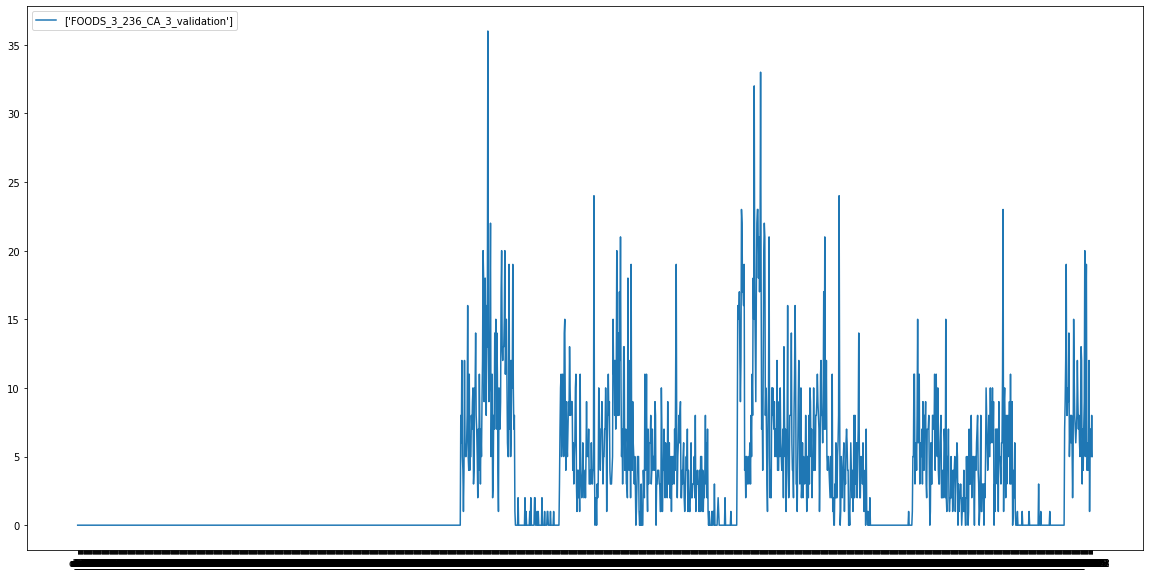

In [21]:
itemNum = 234
sales1 = df.iloc[itemNum,6:]
# sales1 = df.iloc[itemNum,1250:]

label1 = [df.iloc[itemNum,0]]

plt.figure(figsize=(20,10))
plt.plot(sales1, label = label1)
plt.legend(loc='upper left')
plt.show()

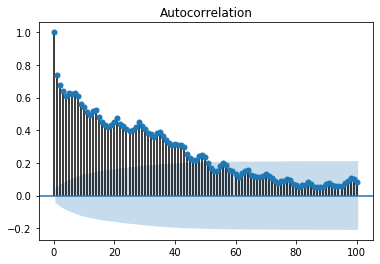

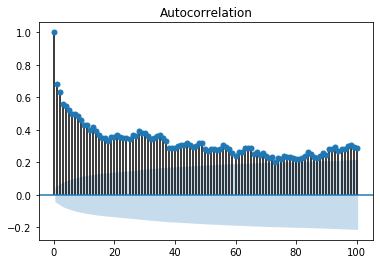

In [22]:
import statsmodels.api as sm

itemNum = 234
sm.graphics.tsa.plot_acf(df.iloc[itemNum,6:], lags=100)
plt.show()

itemNum = 432
sm.graphics.tsa.plot_acf(df.iloc[itemNum,6:], lags=100)
plt.show()

In [155]:
# prepare X data 
xTrain = pd.get_dummies(calendarDF.loc[:1882,['event_name_1','event_name_2']].fillna(0))

xTrain['event_name_1_Easter'] = xTrain['event_name_1_Easter'] + xTrain['event_name_2_Easter']
xTrain['event_name_1_Cinco De Mayo'] = xTrain['event_name_1_Cinco De Mayo'] + xTrain['event_name_2_Cinco De Mayo']
xTrain['event_name_1_OrthodoxEaster'] = xTrain['event_name_1_OrthodoxEaster'] + xTrain['event_name_2_OrthodoxEaster']
xTrain["event_name_1_Father's day"] = xTrain["event_name_1_Father's day"] + xTrain["event_name_2_Father's day"]

columnList = ['event_name_1_Chanukah End', 'event_name_1_Christmas',
       'event_name_1_Cinco De Mayo', 'event_name_1_ColumbusDay',
       'event_name_1_Easter', 'event_name_1_Eid al-Fitr',
       'event_name_1_EidAlAdha', "event_name_1_Father's day",
       'event_name_1_Halloween', 'event_name_1_IndependenceDay',
       'event_name_1_LaborDay', 'event_name_1_LentStart',
       'event_name_1_LentWeek2', 'event_name_1_MartinLutherKingDay',
       'event_name_1_MemorialDay', "event_name_1_Mother's day",
       'event_name_1_NBAFinalsEnd', 'event_name_1_NBAFinalsStart',
       'event_name_1_NewYear', 'event_name_1_OrthodoxChristmas',
       'event_name_1_OrthodoxEaster', 'event_name_1_Pesach End',
       'event_name_1_PresidentsDay', 'event_name_1_Purim End',
       'event_name_1_Ramadan starts', 'event_name_1_StPatricksDay',
       'event_name_1_SuperBowl', 'event_name_1_Thanksgiving',
       'event_name_1_ValentinesDay', 'event_name_1_VeteransDay']

xTrain = xTrain[columnList]

dayNum = pd.DataFrame(np.arange(0,len(xTrain)),columns=['dayNum'])

xTrain['dayNum'] = dayNum




[0.51875093]
[[-8.37703525e-02 -5.77354684e-01  2.16785642e-02  5.30570699e-02
   8.65133483e-03  5.21136025e-02 -2.03071211e-03  8.02919345e-02
  -1.27244301e-01  1.17088102e-01  1.83374789e-01 -7.92827638e-02
  -1.08980638e-01 -1.60149941e-02 -8.59261523e-03  5.30468926e-02
  -2.74151269e-03 -1.80924819e-02 -1.87787220e-01 -9.41850280e-03
   8.36215751e-02 -2.84012742e-02  2.19092788e-02  3.57624812e-02
   6.47639569e-02 -1.42700499e-02  1.40889343e-01 -1.73909865e-01
  -1.09471769e-01  7.31353645e-03  5.56500856e-05]]


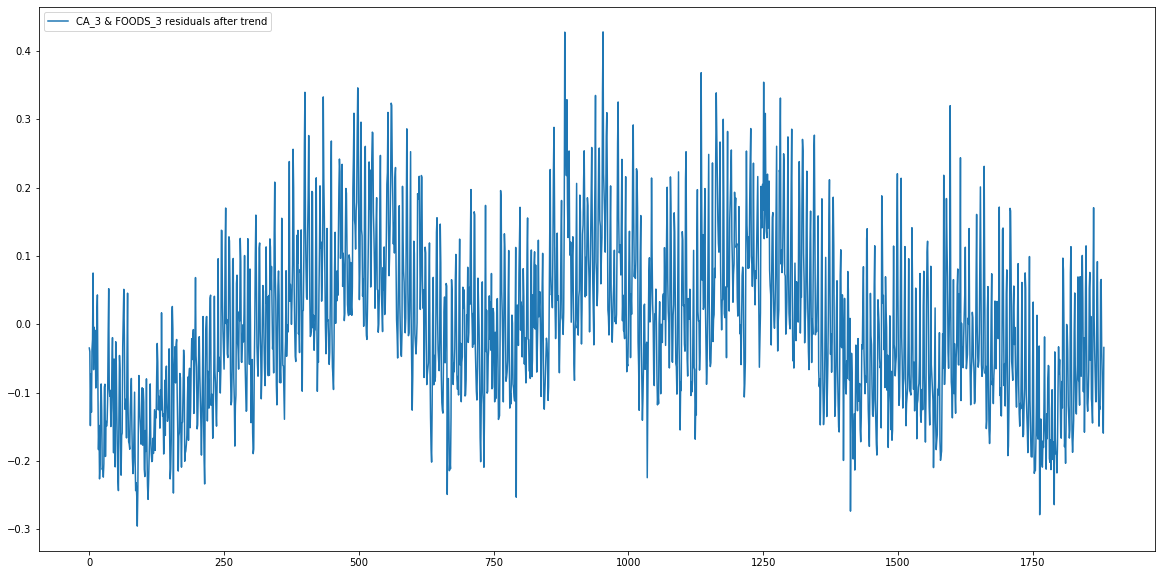

In [162]:
# using d_1 -> d_1883 for training
# d_1884 -> d1913 for validation

trainDF = df.iloc[:,6:1889].sum()
validationDF = df.iloc[:,1889:].sum()

# normalize
yTrain = np.array((trainDF-trainDF.min())/(trainDF.max()-trainDF.min())).reshape(-1, 1)
# xTrain = np.arange(0,len(xTrain)).reshape(-1, 1)


# modeling trend
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()  
regressor.fit(xTrain, yTrain)
print(regressor.intercept_)
print(regressor.coef_)

trendResid = yTrain - regressor.predict(xTrain)

labels = ['CA_3 & FOODS_3 residuals after trend']

plt.figure(figsize=(20,10))
plt.plot(xTrain['dayNum'], trendResid)
plt.legend(labels, loc='upper left')
plt.show()



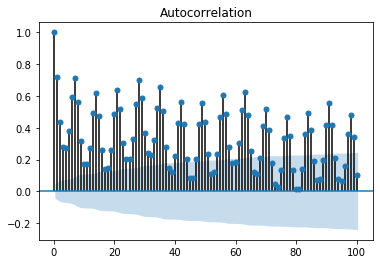

In [159]:
sm.graphics.tsa.plot_acf(trendResid, lags=100)
plt.show()

In [160]:
df

id      item_id  dept_id cat_id store_id  \
8324  FOODS_3_001_CA_3_validation  FOODS_3_001  FOODS_3  FOODS     CA_3   
8325  FOODS_3_002_CA_3_validation  FOODS_3_002  FOODS_3  FOODS     CA_3   
8326  FOODS_3_003_CA_3_validation  FOODS_3_003  FOODS_3  FOODS     CA_3   
8327  FOODS_3_004_CA_3_validation  FOODS_3_004  FOODS_3  FOODS     CA_3   
8328  FOODS_3_005_CA_3_validation  FOODS_3_005  FOODS_3  FOODS     CA_3   
...                           ...          ...      ...    ...      ...   
9142  FOODS_3_823_CA_3_validation  FOODS_3_823  FOODS_3  FOODS     CA_3   
9143  FOODS_3_824_CA_3_validation  FOODS_3_824  FOODS_3  FOODS     CA_3   
9144  FOODS_3_825_CA_3_validation  FOODS_3_825  FOODS_3  FOODS     CA_3   
9145  FOODS_3_826_CA_3_validation  FOODS_3_826  FOODS_3  FOODS     CA_3   
9146  FOODS_3_827_CA_3_validation  FOODS_3_827  FOODS_3  FOODS     CA_3   

     state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  \
8324       CA    4    1    1    0  ...       2       0       6       2   
8325       CA    0    0    0    0  ...       0       0       0       0   
8326       CA    0    0    0    0  ...       1       1       3       1   
8327       CA    0    0    0    0  ...       2       0       2       0   
8328       CA    1    3    0    1  ...       0       0       0       0   
...       ...  ...  ...  ...  ...  ...     ...     ...     ...     ...   
9142       CA   10    5    4    5  ...       2       2       2       3   
9143       CA    1    3    1    2  ...       0       3       1       0   
9144       CA    0    0    0    0  ...       3       0       4       3   
9145       CA    0    0    0    0  ...       5       2       2       0   
9146       CA    0    0    0    0  ...       6       9       2       6   

      d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
8324       0       3       4       0       0       2  
8325       0       0       0       0       0       0  
8326       2       0       0       1       1       3  
8327       0       0       0       0       0       1  
8328       0       0       0       0       0       0  
...      ...     ...     ...     ...     ...     ...  
9142       3       2       3       4       1       0  
9143       1       0       4       1       0       1  
9144       3       0       0       3       3       6  
9145       1       1       3       0       1       3  
9146       9       3       1       3       3      13  

[823 rows x 1919 columns]

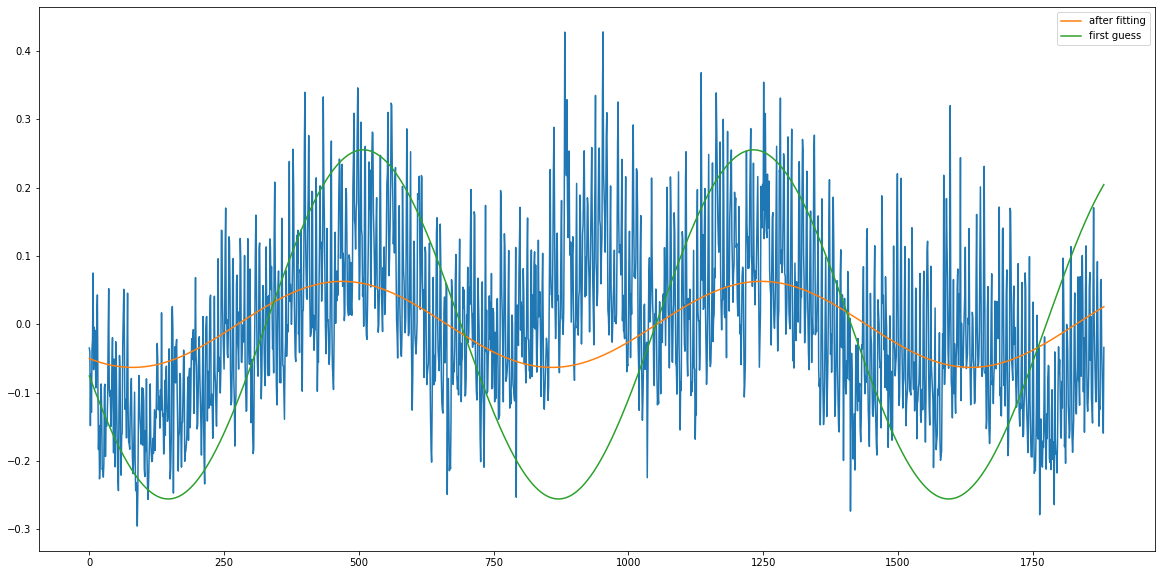

In [210]:
from scipy.optimize import curve_fit

N = 1883
t = np.linspace(0, 4*np.pi, N)
data = trendResid.squeeze()

guess_freq = 1.3
guess_amplitude = 3*np.std(data)/(2**0.5)
guess_phase = np.pi+.3
guess_offset = np.mean(data)

p0=[guess_freq, guess_amplitude,
    guess_phase, guess_offset]

def my_sin(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset

fit = curve_fit(my_sin, t, data, p0=p0)

data_first_guess = my_sin(t, *p0)

data_fit = my_sin(t, *fit[0])

plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()

In [181]:
np.linspace(0, 4*np.pi, N)

array([0.00000000e+00, 6.67713635e-03, 1.33542727e-02, ...,
       1.25530163e+01, 1.25596935e+01, 1.25663706e+01])

In [209]:
3.0*np.sin(t+0.001) + 0.5 + np.random.randn(N)

array([ 1.05032214,  0.42339586,  1.04746682, ...,  0.78454257,
       -0.35018549,  0.4450126 ])